# 의사결정트리로 값 예측하기

In [2]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import mglearn
import platform

if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    matplotlib.rc('font', family='AppleGothic')
else:
    matplotlib.rc('font', family='NanumGothic')

Feature importances: [0. 1.]


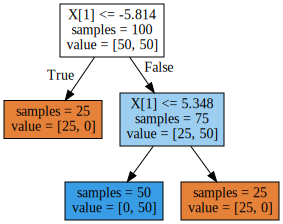

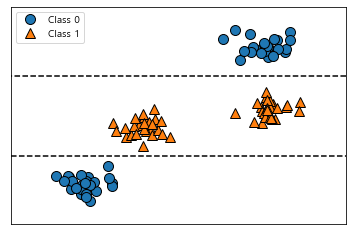

In [3]:
mglearn.plots.plot_tree_not_monotone()

In [4]:
ram_price = pd.read_csv('datasets/ram_price.csv')
ram_price

,Unnamed: 0,date,price
0,0,1957.00,4.110418e+08
1,1,1959.00,6.794772e+07
2,2,1960.00,5.242880e+06
3,3,1965.00,2.642412e+06
4,4,1970.00,7.340030e+05
...,...,...,...
328,328,2015.58,4.500000e-03
329,329,2015.67,4.300000e-03
330,330,2015.75,4.200000e-03
331,331,2015.83,3.800000e-03


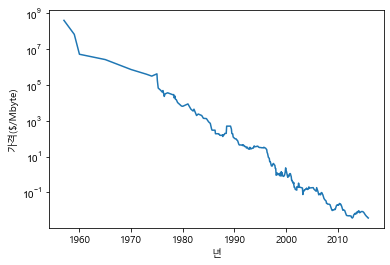

In [5]:
plt.yticks(fontname='Arial')
plt.semilogy(ram_price.date, ram_price.price)
plt.xlabel('년')
plt.ylabel('가격($/Mbyte)')
plt.show()

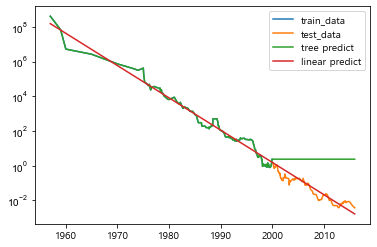

In [6]:
#의사결정트리와 선형회귀 비교

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_price[ram_price.date < 2000]
data_test = ram_price[ram_price.date >= 2000]

X_train = data_train.date[:,np.newaxis] #newaxis: 1차원 데이터인 data_train을 2차원 데이터로 변경하여 X_train에 저장
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
X_all = ram_price.date[:,np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.yticks(fontname='Arial')
plt.semilogy(data_train.date, data_train.price, label='train_data')
plt.semilogy(data_test.date, data_test.price, label='test_data')
plt.semilogy(ram_price.date, price_tree, label='tree predict')
plt.semilogy(ram_price.date, price_lr, label='linear predict')
plt.legend()
plt.show()

# Random Forest 예제

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, Xtest, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

In [10]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [11]:
arr = ['다시 여기 바닷가', '마리아', '그 여름을 틀어줘']
for idx, val in enumerate(arr):
    print(idx+1, '위 곡:', val)

1 위 곡: 다시 여기 바닷가
2 위 곡: 마리아
3 위 곡: 그 여름을 틀어줘


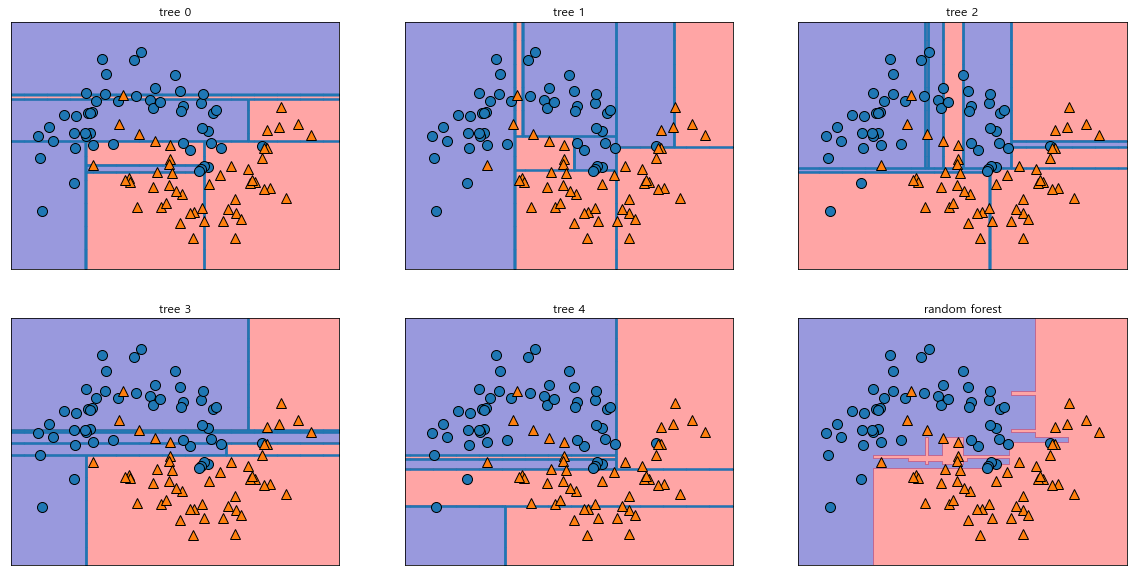

In [16]:
fig, axes = plt.subplots(2, 3, figsize = (20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):  # ravel ; 형상을 1차원화
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X, fill= True, ax = axes[-1, -1], alpha = .4)
axes[-1, -1].set_title('random forest')  # random forest의 경우 여러 tree의 중첩 부분(다수결 방식)으로 최종 tree가 결정되는 방식
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

In [21]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state = 0)

In [22]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)  # shift+tab : default값 미리 보기
forest.fit(X_train, y_train)
print('train accuracy: {:.3f}'.format(forest.score(X_train, y_train)))
print('test accuracy: {:.3f}'.format(forest.score(X_test, y_test)))

# train accuracy: 1.000 ==> overfitting
# test accuracy: 0.972

train accuracy: 1.000
test accuracy: 0.972


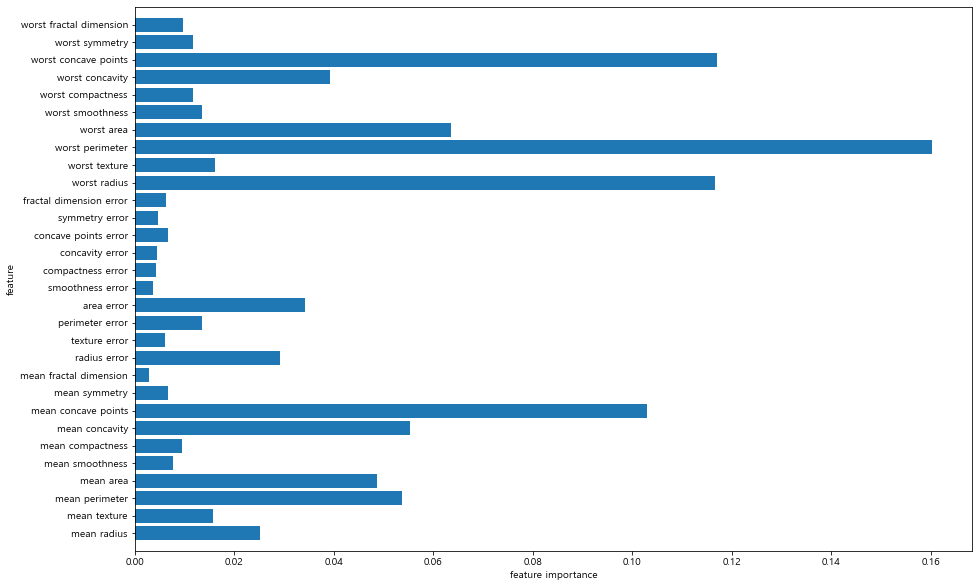

In [27]:
plt.figure(figsize = (15, 10))
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel('feature')
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(forest)

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)  # hyper_parameter tuning
gbrt.fit(X_train, y_train)
print('train accuracy: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('test accuracy: {:.3f}'.format(gbrt.score(X_test, y_test)))

train accuracy: 0.991
test accuracy: 0.972


In [39]:
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate = 0.01)  # hyper_parameter tuning
gbrt.fit(X_train, y_train)
print('train accuracy: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('test accuracy: {:.3f}'.format(gbrt.score(X_test, y_test)))

train accuracy: 0.988
test accuracy: 0.965


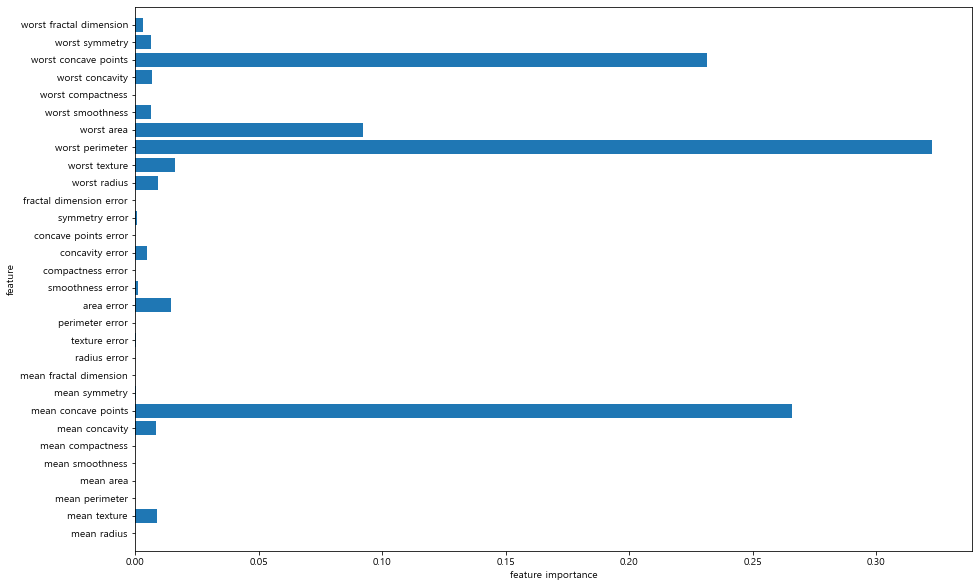

In [41]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)  # hyper_parameter tuning
gbrt.fit(X_train, y_train)
plt.figure(figsize = (15, 10))
plot_feature_importances_cancer(gbrt)

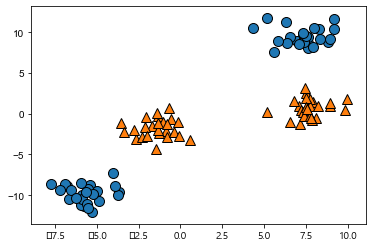

In [48]:
from sklearn.datasets import make_blobs
plt.yticks(fontname='Arial')
X, y = make_blobs(centers = 4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

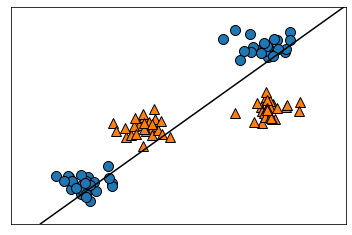

In [49]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

선으로 분류할 수 없음 ==> kernel trick을 이용하여 해결

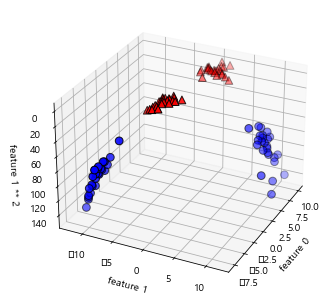

In [61]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

X_new = np.hstack([X, X[:,1:]**2])
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
mask = y==0
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b', cmap=mglearn.cm2, s=60, edgecolors='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r', cmap=mglearn.cm2, s=60, edgecolors='k')
ax.set_xlabel('feature0'); ax.set_ylabel('feature1'); ax.set_zlabel('feature1**2')
plt.yticks(fontname='Arial'); plt.xticks(fontname='Arial')
plt.show()

In [62]:
np.linspace(1,10,20) #1~10 사이의 값 20개를 뽑는 것

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

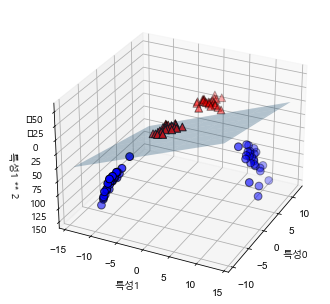

In [63]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:,0].min()-2, X_new[:,0].max()+2, 50)
yy = np.linspace(X_new[:,1].min()-2, X_new[:,1].max()+2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0]*XX+coef[1]*YY+intercept)/-coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")
plt.yticks(fontname='Arial')
plt.xticks(fontname='Arial')
plt.show()

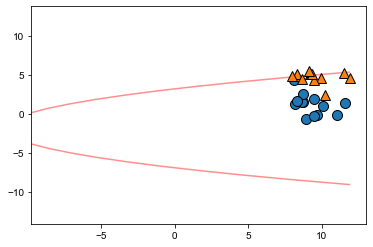

In [70]:
ZZ = YY**2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contour(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xticks(fontname='Arial'); plt.yticks(fontname='Arial')
plt.show()

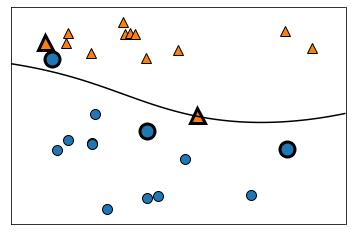

In [71]:
from sklearn.svm import SVC #SVR: Regression using SVM // SVC: Classfication using SVM

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
sv = svm.support_vectors_ #서포트벡터를 더 크게 표현하기 위함
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15, markeredgewidth=3)
plt.show()

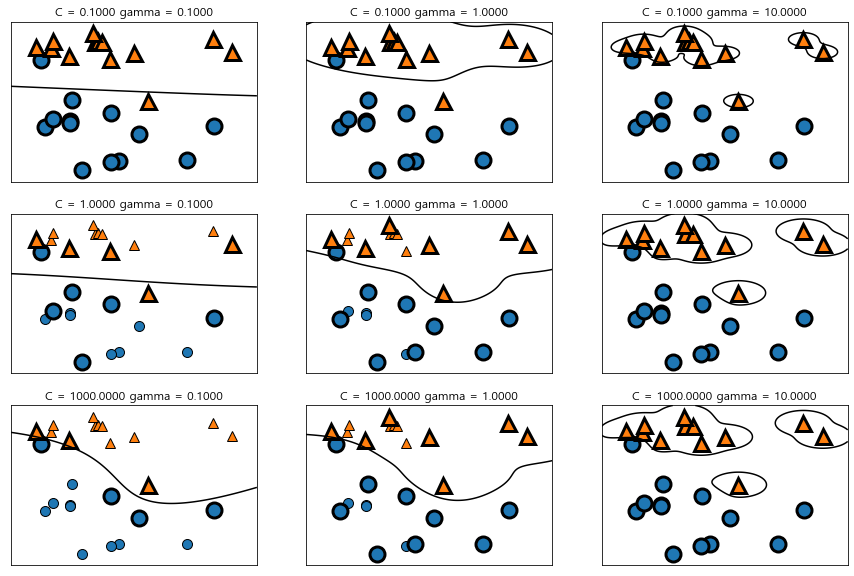

In [72]:
fig, axes = plt.subplots(3, 3, figsize = (15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma = gamma, ax = a)  # C = 0.1, 1, 1000 // gamma = .1, 1, 10
        # C값이 커지는 것은 overfitting, 이 예제에서 정답은 (2, 1)

# 요약

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state = 0)
svc = SVC()
svc.fit(X_train, y_train)
print("train accuracy {:.2f}".format(svc.score(X_train, y_train)))
print("test accuracy {:.2f}".format(svc.score(X_test, y_test)))
# train accuracy 0.90 
# test accuracy 0.94
# ==> underfitting(train accuracy < test accuracy)

train accuracy 0.90
test accuracy 0.94


SVC model에서는 scaling 했을 때 효율적인 학습이 가능하다는 이점이 있음.

In [102]:
min_on_training = X_train.min(axis = 0)
range_on_training = (X_train - min_on_training).max(axis = 0)
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최소값\n", X_train_scaled.min(axis = 0))
print("특성별 최댓값\n", X_train_scaled.max(axis = 0))
# 공식 : (자신 값 - 최솟값) / 범위값(최댓값 - 최솟값)

특성별 최소값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [103]:
X_test_scaled = (X_test - min_on_training) / range_on_training

In [104]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("train accuracy {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("test accuracy {:.2f}".format(svc.score(X_test_scaled, y_test)))

train accuracy 0.98
test accuracy 0.97


In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled2 = scaler.transform(X_train)
X_test_scaled2 = scaler.transform(X_test)
svc = SVC()
svc.fit(X_train_scaled2, y_train)
print("train accuracy {:.2f}".format(svc.score(X_train_scaled2, y_train)))
print("test accuracy {:.2f}".format(svc.score(X_test_scaled2, y_test)))
# train accuracy 0.98
# test accuracy 0.97

train accuracy 0.98
test accuracy 0.97


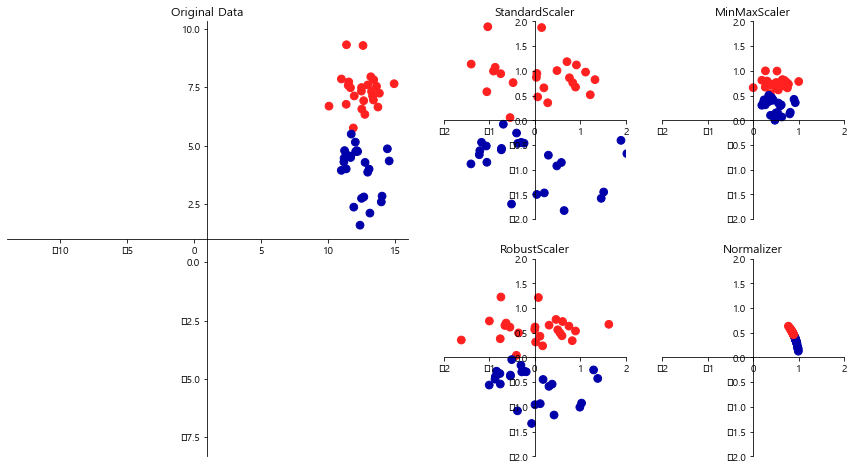

In [107]:
mglearn.plots.plot_scaling()

In [108]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
svm = SVC(C = 100)
svm.fit(X_train, y_train)
print("test acc: {:.2f}".format(svm.score(X_test, y_test)))
# test acc: 0.94

test acc: 0.94


In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm = SVC()
svm.fit(X_train_scaled, y_train)
print("test acc : {:.2f}".format(svm.score(X_test_scaled, y_test)))

test acc : 0.97


In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 훈련 후 바로 transform
X_test_scaled = scaler.transform(X_test)
svm = SVC()
svm.fit(X_train_scaled, y_train)
print("test acc : {:.2f}".format(svm.score(X_test_scaled, y_test)))
# test acc : 0.97

test acc : 0.97


In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm = SVC()
svm.fit(X_train_scaled, y_train)
print("test acc : {:.3f}".format(svm.score(X_test_scaled, y_test)))
# test acc : 0.97 ; min-max scaler와 standard scaler 둘 다 비슷한 양상

test acc : 0.965
